In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import ta  # technical analysis indicators

In [2]:
btc = yf.download('BTC-USD', start='2020-01-01', end='2024-12-31', auto_adjust=True)
btc.reset_index(inplace=True)
btc.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
0,2020-01-01,7200.174316,7254.330566,7174.944336,7194.892090,18565664997
1,2020-01-02,6985.470215,7212.155273,6935.270020,7202.551270,20802083465
2,2020-01-03,7344.884277,7413.715332,6914.996094,6984.428711,28111481032
3,2020-01-04,7410.656738,7427.385742,7309.514160,7345.375488,18444271275
4,2020-01-05,7411.317383,7544.497070,7400.535645,7410.451660,19725074095


In [3]:
# --- RSI ---
from ta.momentum import RSIIndicator

# Squeeze the 'Close' column to ensure it's 1-dimensional
close_series = btc['Close'].squeeze() 

rsi = RSIIndicator(close=close_series, window=14)
btc['RSI'] = rsi.rsi()

In [4]:
# 1 if next day's price is higher than today, else 0
btc['Target'] = (btc['Close'].shift(-1) > btc['Close']).astype(int)

In [5]:
btc.dropna(inplace=True)
btc.reset_index(drop=True, inplace=True)

In [6]:
btc.to_csv('../data/btc_features.csv', index=False)

In [7]:
btc.index = pd.to_datetime(btc.index)

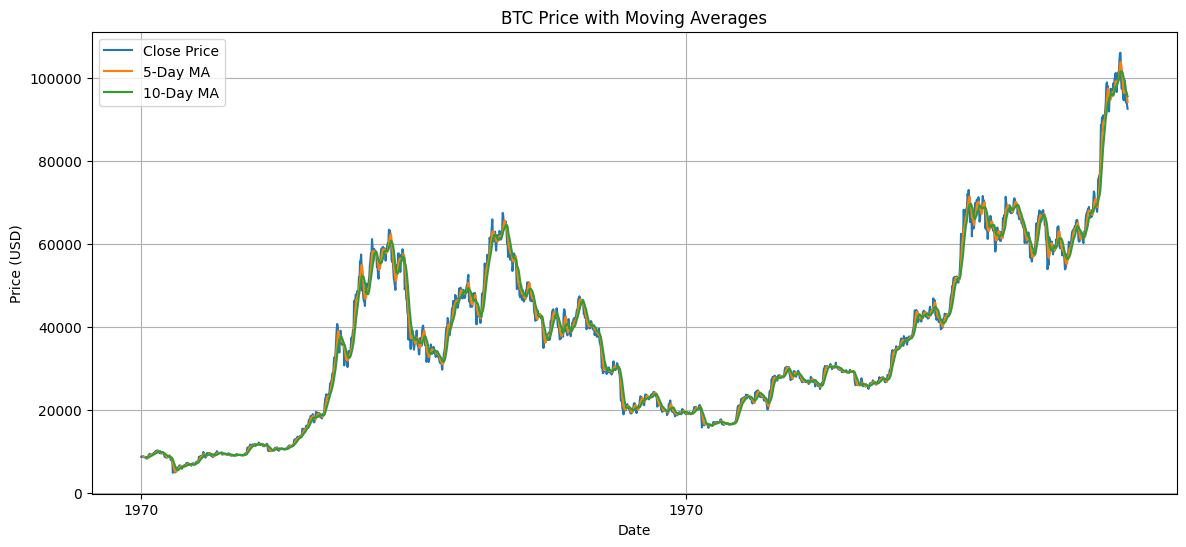

In [8]:
plt.figure(figsize=(14, 6))
plt.plot(btc['Close'], label='Close Price')
plt.plot(btc['Close'].rolling(window=5).mean(), label='5-Day MA')
plt.plot(btc['Close'].rolling(window=10).mean(), label='10-Day MA')
plt.title('BTC Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()